In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [229]:
df = pd.read_csv("ages_dataset.csv")
df.head()

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death,Associated Countries,Associated Country Coordinates (Lat/Lon),Associated Country Life Expectancy
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0,"['United Kingdom', 'United States']","[(55.378051, -3.435973), (37.09024, -95.712891)]","[81.3, 78.5]"
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0,['United Kingdom'],"[(55.378051, -3.435973)]",[81.3]
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0,['United States'],"[(37.09024, -95.712891)]",[78.5]
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0,['Austria'],"[(47.516231, 14.550072)]",[81.6]
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0,"['Austria', 'Italy']","[(47.516231, 14.550072), (41.87194, 12.56738)]","[81.6, 82.9]"


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223009 entries, 0 to 1223008
Data columns (total 13 columns):
 #   Column                                    Non-Null Count    Dtype  
---  ------                                    --------------    -----  
 0   Id                                        1223009 non-null  object 
 1   Name                                      1223009 non-null  object 
 2   Short description                         1155109 non-null  object 
 3   Gender                                    1089363 non-null  object 
 4   Country                                   887500 non-null   object 
 5   Occupation                                1016095 non-null  object 
 6   Birth year                                1223009 non-null  int64  
 7   Death year                                1223008 non-null  float64
 8   Manner of death                           53603 non-null    object 
 9   Age of death                              1223008 non-null  float64
 10  Associ

* 1,223,009 data entries
* 13 columns/attributes
* Null value counts can be derived from the information above.
* "Manner of death" contains the least values

In [231]:
#Print number of unique values of each column
print("\nSize of each variation of categories:")
for column in df:
    print(column + ":", df[column].unique().size)


Size of each variation of categories:
Id: 1222997
Name: 1130871
Short description: 512440
Gender: 21
Country: 5962
Occupation: 9314
Birth year: 2173
Death year: 2254
Manner of death: 207
Age of death: 131
Associated Countries: 1900
Associated Country Coordinates (Lat/Lon): 1900
Associated Country Life Expectancy: 1619


## Preprocessing

### Remove unusable data
**Short description** - short descriptions do not have a standardised format, and are largely missing as most data entries are not of famous individuals.<br>
**Country** - country contains the same information as Associated Countries except with the name at the time of the persons association with it. Modern day names of the countries are of greater interest.<br>
**Associated Country Coordinates** - Geographical data about locations are not of interest.


Data entries with birth dates prior to the 1800 are to be discarded as reliable record keeping practices were not in place. Bias to the recording of successful, famous or wealthy individuals lives introduces an unacceptable amount of noise to the data. The lives of the exceptional do not represent the general population.

In [232]:
# Drop columns that are not needed
df.drop(['Short description', 'Country', 'Associated Country Coordinates (Lat/Lon)'], axis=1, inplace=True)
# Drop entries which have a Birth year prior to 1800
df = df[df['Birth year'] > 1800]

226,660 entries removed due to the date cutoff

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996349 entries, 1 to 1223008
Data columns (total 10 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Id                                  996349 non-null  object 
 1   Name                                996349 non-null  object 
 2   Gender                              884248 non-null  object 
 3   Occupation                          851098 non-null  object 
 4   Birth year                          996349 non-null  int64  
 5   Death year                          996348 non-null  float64
 6   Manner of death                     48864 non-null   object 
 7   Age of death                        996348 non-null  float64
 8   Associated Countries                742643 non-null  object 
 9   Associated Country Life Expectancy  742415 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 83.6+ MB


#### Normalise Formats

In [234]:
print(df.dtypes)
df.head(1)

Id                                     object
Name                                   object
Gender                                 object
Occupation                             object
Birth year                              int64
Death year                            float64
Manner of death                        object
Age of death                          float64
Associated Countries                   object
Associated Country Life Expectancy     object
dtype: object


,Id,Name,Gender,Occupation,Birth year,Death year,Manner of death,Age of death,Associated Countries,Associated Country Life Expectancy
1,Q42,Douglas Adams,Male,Artist,1952,2001.0,natural causes,49.0,['United Kingdom'],[81.3]


In [235]:
#fill empty values with 0 to convert data type
df["Death year"] = df["Death year"].fillna(0)
df["Age of death"] = df["Age of death"].fillna(0)
#convert numerical values to int32
df["Death year"] = df["Death year"].astype('int32')
df["Birth year"] = df["Birth year"].astype('int32')
df["Age of death"] = df["Age of death"].astype('int32')
#Convert string categorical data to all lowercase
df["Name"] = df["Name"].str.lower()
df["Gender"] = df["Gender"].str.lower()
df["Associated Countries"] = df["Associated Countries"].str.lower()
df["Occupation"] = df["Occupation"].str.lower()
df["Manner of death"] = df["Manner of death"].str.lower()
print(df.dtypes)
df.head(1)

Id                                    object
Name                                  object
Gender                                object
Occupation                            object
Birth year                             int32
Death year                             int32
Manner of death                       object
Age of death                           int32
Associated Countries                  object
Associated Country Life Expectancy    object
dtype: object


,Id,Name,Gender,Occupation,Birth year,Death year,Manner of death,Age of death,Associated Countries,Associated Country Life Expectancy
1,Q42,douglas adams,male,artist,1952,2001,natural causes,49,['united kingdom'],[81.3]


#### Remove duplicates

In [236]:
print("Dataframe duplicates: ", df.duplicated().sum())

for column in df:
    print(column, "duplicates: ", df[column].duplicated().sum())

Dataframe duplicates:  9
Id duplicates:  11
Name duplicates:  63190
Gender duplicates:  996329
Occupation duplicates:  988661
Birth year duplicates:  996135
Death year duplicates:  996130
Manner of death duplicates:  996170
Age of death duplicates:  996222
Associated Countries duplicates:  994551
Associated Country Life Expectancy duplicates:  994815


As seen below, there is an issue with duplicates where there are duplicates of famous figures, which we can be (somewhat) certain are the same entry. However we can not remove all entries with duplicated names because many names are common. Removing entries with the same name, birth year, and death year is one possible but incomplete solution.

In [237]:
# Find duplicate names
duplicate_names = df[df.duplicated(subset=['Name'], keep=False)]
duplicate_names_list = duplicate_names['Name'].unique().tolist()
print(duplicate_names_list)

# List of duplicate names with a count of how many times they appear
duplicate_names_count = duplicate_names['Name'].value_counts()
print(duplicate_names_count)


['douglas adams', 'victor hugo', 'giuseppe garibaldi', 'jean moulin', 'roald amundsen', 'charles darwin', 'josé joaquín pérez', 'richard wagner', 'neil armstrong', 'barbara', 'giuseppe farina', 'charles de gaulle', 'hans schmidt', 'willy brandt', 'helmut schmidt', 'helmut kohl', 'george harrison', 'friedrich ebert', 'michael jackson', 'graham hill', 'jim clark', 'john surtees', 'david cairns', 'john gregg', 'james coburn', 'paul otto', 'manfred von richthofen', 'marcus ravenswaaij', 'birger kildal', 'luigi bailo', 'james brown', 'james joyce', 'antonín dvořák', 'otto frank', 'alfred hitchcock', 'frank herbert', 'winston churchill', 'andrew johnson', 'henry ford', 'max planck', 'karl marx', 'max weber', 'graham taylor', 'richard nixon', 'alice greene', 'neville chamberlain', 'karl renner', 'otto bauer', 'michael mayr', 'antoni grabowski', 'ángel ramos', 'jules dubois', 'pedro beltrán', 'robert cecil', 'helmar frank', 'georges lagrange', 'heinrich schmid', 'alfred marshall', 'richard str

In [238]:
# Drop duplicate entries based on 'Name', 'Birth year', and 'Death year', keeping only the first occurrence
df.drop_duplicates(subset=['Name', 'Birth year', 'Death year'], keep='first', inplace=True)


In [239]:
df.drop_duplicates(subset=["Id"], inplace=True)

print("Dataframe duplicates: ", df.duplicated().sum())

for column in df:
    print(column, "duplicates: ", df[column].duplicated().sum())

# Find duplicate names
duplicate_names = df[df.duplicated(subset=['Name'], keep=False)]
duplicate_names_list = duplicate_names['Name'].unique().tolist()
print(duplicate_names_list)

Dataframe duplicates:  0
Id duplicates:  0
Name duplicates:  62879
Gender duplicates:  996018
Occupation duplicates:  988351
Birth year duplicates:  995824
Death year duplicates:  995819
Manner of death duplicates:  995859
Age of death duplicates:  995911
Associated Countries duplicates:  994240
Associated Country Life Expectancy duplicates:  994504
['douglas adams', 'victor hugo', 'giuseppe garibaldi', 'jean moulin', 'roald amundsen', 'charles darwin', 'josé joaquín pérez', 'richard wagner', 'neil armstrong', 'barbara', 'giuseppe farina', 'charles de gaulle', 'hans schmidt', 'willy brandt', 'helmut schmidt', 'helmut kohl', 'george harrison', 'friedrich ebert', 'michael jackson', 'graham hill', 'jim clark', 'john surtees', 'david cairns', 'john gregg', 'james coburn', 'paul otto', 'manfred von richthofen', 'marcus ravenswaaij', 'birger kildal', 'luigi bailo', 'james brown', 'james joyce', 'antonín dvořák', 'otto frank', 'alfred hitchcock', 'frank herbert', 'winston churchill', 'andrew 

In [240]:
# Check data entries are not the same
charles_darwin_entries = df[df['Name'] == 'charles darwin']
print(douglas_adams_entries)
print(charles_darwin_entries)

               Id           Name Gender Occupation  Birth year  Death year  \
1             Q42  douglas adams   male     artist        1952        2001   
958845  Q21454969  douglas adams   male     artist        1853        1920   

       Manner of death  Age of death Associated Countries  \
1       natural causes            49   ['united kingdom']   
958845             NaN            67   ['united kingdom']   

       Associated Country Life Expectancy  
1                                  [81.3]  
958845                             [81.3]  
              Id            Name Gender          Occupation  Birth year  \
91         Q1035  charles darwin   male          researcher        1809   
432455  Q5076728  charles darwin   male  military personnel        1894   

        Death year Manner of death  Age of death Associated Countries  \
91            1882             NaN            73   ['united kingdom']   
432455        1941             NaN            47   ['united kingdom']   

   

### Formatting String Types

The Gender and Occupation columns are categorical but entries with multiple listed categories are represented as a string with a ';', ',', or ';' seperator and a concatenated string. eg "eunich; male" or "transgender male; female", "dock worker: labourer". To remedy this the seperators will be standardised to ';' and the entries converted to lists. This way each category can be used individually.

Additionally the Associated Countries category is a string which looks like a list, therefore it's brackets and quotes must be removed.

In [265]:
# Standardise seperators
df['Occupation'] = df['Occupation'].str.replace(', ', '; ')
df['Occupation'] = df['Occupation'].str.replace(': ', '; ')
df['Gender'] = df['Gender'].str.replace(', ', '; ')
df['Associated Countries'] = df['Associated Countries'].str.replace(', ', '; ')
df['Associated Countries'] = df['Associated Countries'].str.replace(': ', '; ')
df['Associated Countries'] = df['Associated Countries'].str.replace(r'[\[\]]', '', regex=True)
df['Associated Countries'] = df['Associated Countries'].str.replace('\'', '', regex=True)
print(df['Occupation'].head(15))
print(df['Associated Countries'].head(15))
df.head()


1           artist
2       politician
6           artist
7           artist
10          artist
12      politician
14    statesperson
16         athlete
17      politician
18          artist
19         athlete
20          artist
21          artist
22      researcher
23      politician
Name: Occupation, dtype: object
1                united kingdom
2                 united states
6                        france
7                        france
10                united states
12                        chile
14    austria; germany; hungary
16                  netherlands
17                        chile
18              belarus; russia
19     czech republic; slovakia
20                united states
21                      jamaica
22                united states
23                        chile
Name: Associated Countries, dtype: object


,Id,Name,Gender,Occupation,Birth year,Death year,Manner of death,Age of death,Associated Countries,Associated Country Life Expectancy
1,Q42,douglas adams,male,artist,1952,2001,natural causes,49,united kingdom,[81.3]
2,Q91,abraham lincoln,male,politician,1809,1865,homicide,56,united states,[78.5]
6,Q272,paul morand,male,artist,1888,1976,NaN,88,france,[82.5]
7,Q296,claude monet,male,artist,1840,1926,natural causes,86,france,[82.5]
10,Q303,elvis presley,male,artist,1935,1977,natural causes,42,united states,[78.5]


## Visualisation

Text(0, 0.5, 'Number of People')

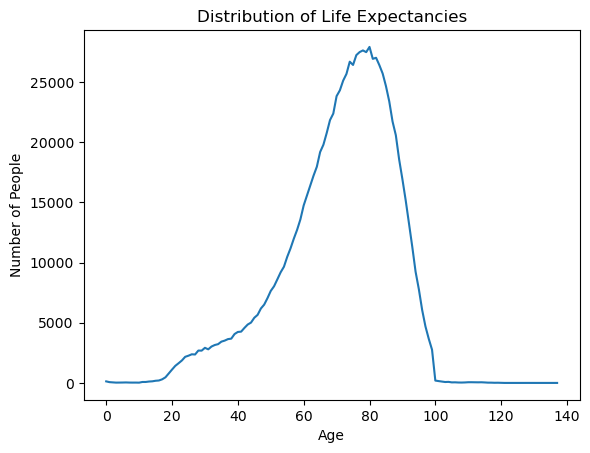

In [242]:
plt.title("Distribution of Life Expectancies")
plt.plot(df["Age of death"].value_counts().sort_index())
plt.xlabel("Age")
plt.ylabel("Number of People")

In [243]:
#display occupations
df['Occupation'].value_counts()

artist                            242800
politician                        153790
athlete                           110278
researcher                         77994
military personnel                 40717
                                   ...  
submariner; autobiographer             1
radio personality; broadcaster         1
tashkent; muhaddith; mufassir          1
mentalism; magician                    1
tailor; model                          1
Name: Occupation, Length: 7686, dtype: int64

In [266]:
# Split the 'Occupation' column into lists
exploded_df = df.copy()
exploded_df['Occupation'] = exploded_df['Occupation'].str.split('; ')
exploded_df = exploded_df.explode('Occupation')


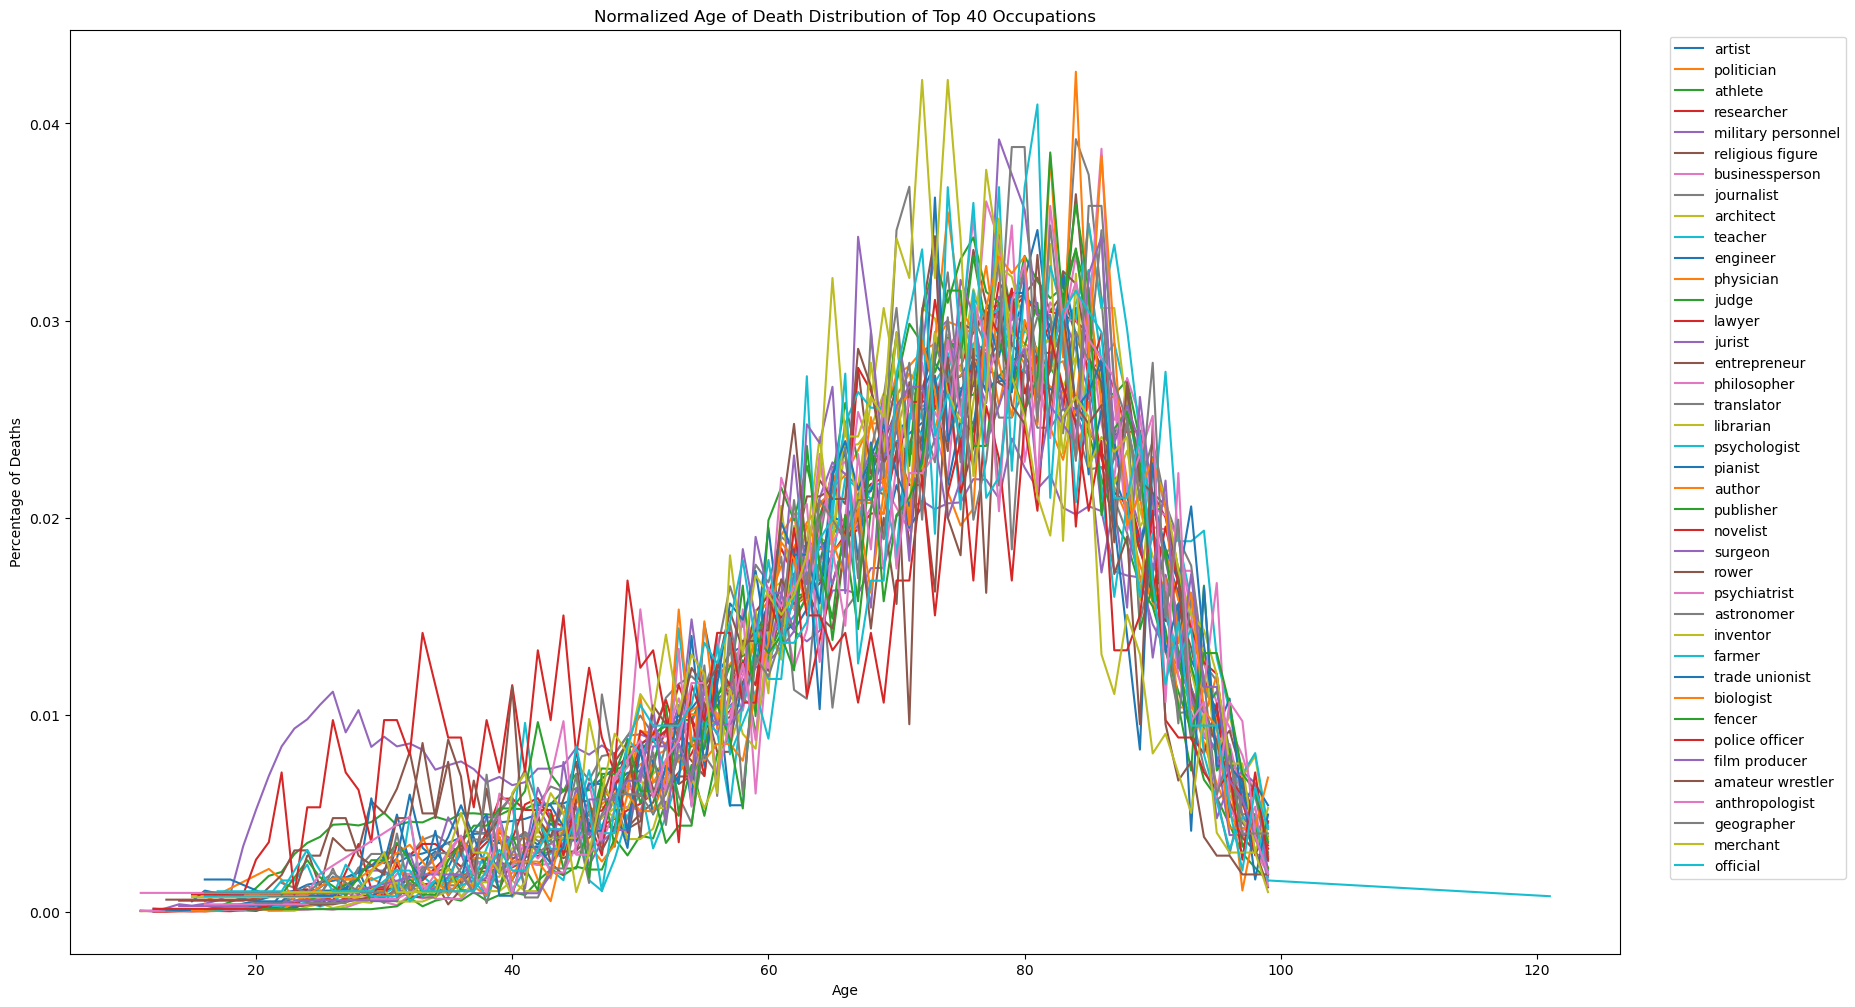

In [252]:
plt.figure(figsize=(20, 12))
plt.title("Normalized Age of Death Distribution of Top 40 Occupations")
top_40_occupations = exploded_df['Occupation'].value_counts().nlargest(40).index.tolist()

precomputed_data = {}
for occupation in top_40_occupations:
    age_counts = exploded_df[exploded_df["Occupation"] == occupation]["Age of death"].value_counts().sort_index()
    total_counts = age_counts.sum()
    precomputed_data[occupation] = age_counts / total_counts

for occupation in top_40_occupations:
    plt.plot(precomputed_data[occupation], label=occupation)

plt.xlabel("Age")
plt.ylabel("Percentage of Deaths")
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

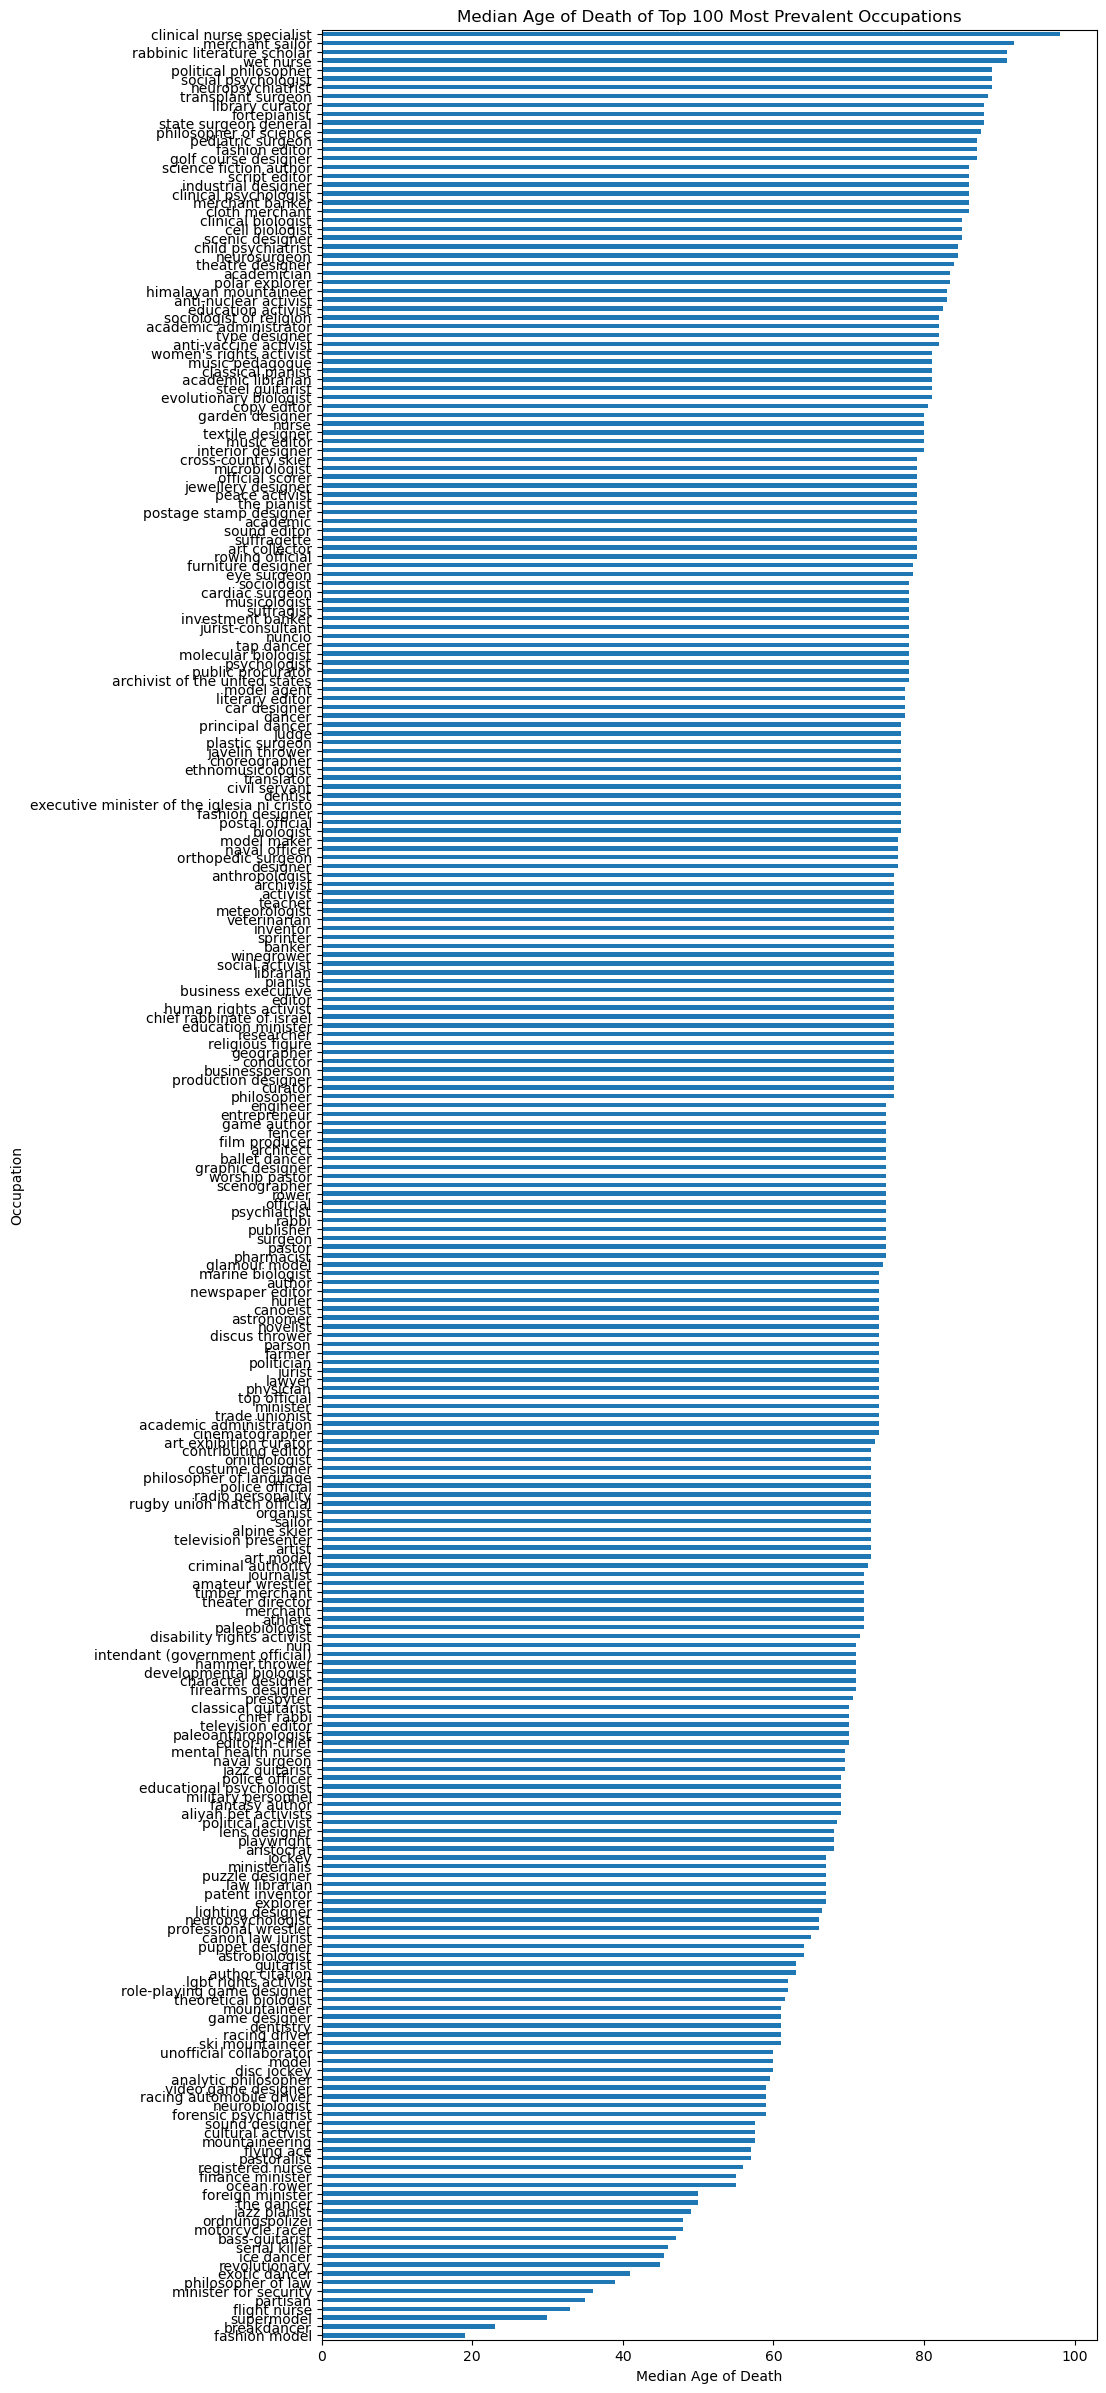

In [278]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your DataFrame (replace 'df' with the actual name of your DataFrame)
# df = ...

# Drop rows with missing values
df_cleaned = exploded_df.dropna(subset=['Occupation'])

# Calculate the prevalence of each occupation
occupation_counts = df_cleaned['Occupation'].explode().value_counts()

# Get the top 100 most prevalent occupations
top_occupations = occupation_counts.nlargest(100).index

# Filter the DataFrame to include only the top 100 occupations
top_df = df_cleaned[df_cleaned['Occupation'].apply(lambda x: any(occupation in x for occupation in top_occupations))]

# Calculate the median age of death for each occupation
occupation_medians = top_df.groupby('Occupation')['Age of death'].median()

# Plotting
plt.figure(figsize=(10, 30))
occupation_medians.sort_values().plot(kind='barh')
plt.title("Median Age of Death of Top 100 Most Prevalent Occupations")
plt.xlabel("Median Age of Death")
plt.ylabel("Occupation")
plt.show()


We have too many occupations. if we want to get any useful/accurate insights we need a way to cluster them.

the occupation column puts people with multiple listed occupations together as a concatenated string with a ; splitting them. This will stop people who are listed with the same occupation being counted as such.

In [254]:
print(exploded_df["Occupation"].unique())
for titles in exploded_df["Occupation"].unique():
    print(titles, "count: ", exploded_df[exploded_df["Occupation"] == titles].size)

['artist' 'politician' 'statesperson' ... 'city attorney' 'tour operator'
 'intermediary']
artist count:  2428000
politician count:  1537900
statesperson count:  2450
athlete count:  1102780
researcher count:  779940
official count:  9520
french resistance fighter count:  1050
businessperson count:  176220
game designer count:  90
role-playing game designer count:  130
architect count:  151300
teacher count:  142460
activist count:  5760
racing automobile driver count:  5290
entrepreneur count:  26090
motorcycle racer count:  5410
formula one driver count:  1850
journalist count:  155510
military personnel count:  407170
business executive count:  5180
engineer count:  120370
farmer count:  12510
author count:  18310
hammer thrower count:  610
nan count:  0
religious figure count:  212570
sailor count:  7560
monk count:  1910
ascetic count:  10
homekeeper count:  210
student count:  1610
nutritionist count:  620
molecular biologist count:  240
drawer count:  340
professional wrestler c

KeyboardInterrupt: 

In [ ]:
print("count: ", df[df["Occupation"] == "Artist"].size)

count:  3659656


Median Age of death by Birth Century

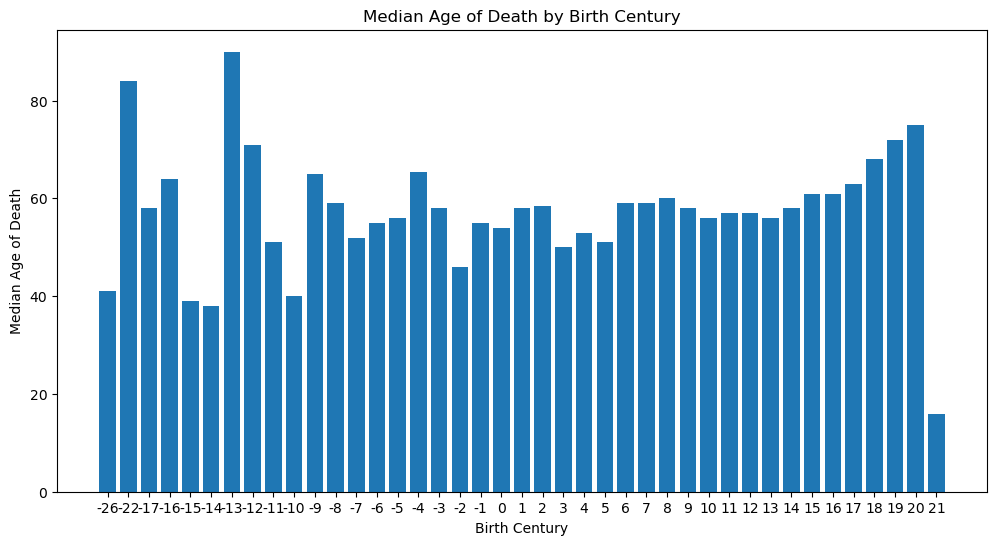

In [ ]:
df['Birth Century'] = (df['Birth year'] // 100) + 1

medians = df.groupby('Birth Century')['Age of death'].median().reset_index()

# Plot the data
plt.figure(figsize=(12, 6))
plt.bar(medians['Birth Century'].astype(str), medians['Age of death'])
plt.xlabel('Birth Century')
plt.ylabel('Median Age of Death')
plt.title('Median Age of Death by Birth Century')
plt.show()


Median age of death by gender

In [ ]:
medians = df.groupby('Gender')['Age of death'].median().reset_index()

# Plot the data
plt.figure(figsize=(20, 6))
plt.bar(medians['Gender'].astype(str), medians['Age of death'])
plt.xlabel('Gender')
plt.ylabel('Median Age of Death')
plt.title('Median Age of Death by Gender')

plt.show()

TypeError: unhashable type: 'list'

The gender is reprented the in the same way as occupation, where entries with multiple listed genders is represented as a string with a ; seperator and a concatenated string. eg "eunich; male" or "transgender male; female". to remedy this each gender listed for each entry will be counted once.

In [ ]:
# Split the 'Gender' column into lists
df['Gender'] = df['Gender'].str.split('; ')

# Explode the DataFrame on the 'Gender' column
exploded_df = df.explode('Gender')

# Calculate the median age of death for each gender
medians = exploded_df.groupby('Gender')['Age of death'].median().reset_index()

# Plot the data
plt.figure(figsize=(20, 6))
plt.bar(medians['Gender'].astype(str), medians['Age of death'])
plt.xlabel('Gender')
plt.ylabel('Median Age of Death')
plt.title('Median Age of Death by Gender')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
# Create a DataFrame where each row is a unique ID and columns are 'Gender' and 'Occupation'
one_hot = pd.get_dummies(exploded_df[['Gender', 'Occupation']])

# Run Apriori algorithm
frequent_itemsets = apriori(one_hot, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print(rules)


c:\Users\Todd\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


               antecedents              consequents  antecedent support  \
0  (Occupation_politician)            (Gender_male)            0.157493   
1            (Gender_male)  (Occupation_politician)            0.801903   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.801903  0.136212    0.864880  1.078535  0.009918    1.466087   
1            0.157493  0.136212    0.169861  1.078535  0.009918    1.014900   

   zhangs_metric  
0       0.086428  
1       0.367579  
